In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
sns.get_dataset_names()

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /Users/Vsevolod/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

## Distribution Plots

In [3]:
#load test data set from seaborn
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


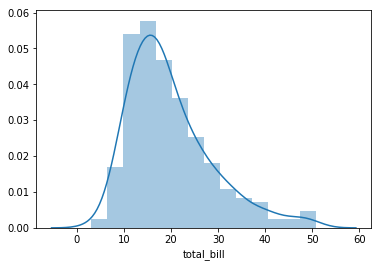

In [5]:
sns.distplot(tips['total_bill'])

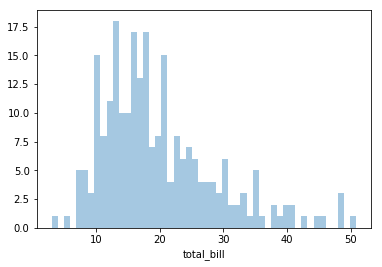

In [6]:
sns.distplot(tips['total_bill'], kde = False, bins = 50)

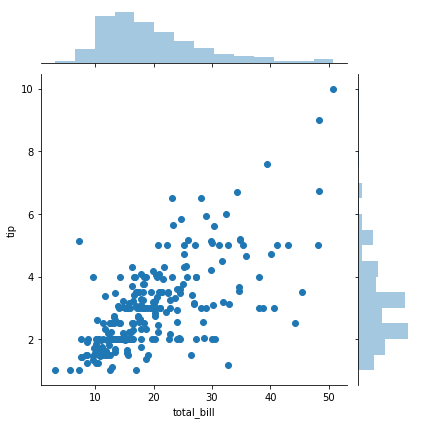

In [7]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)

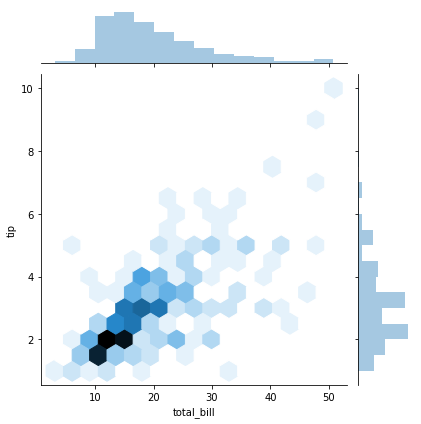

In [8]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex')

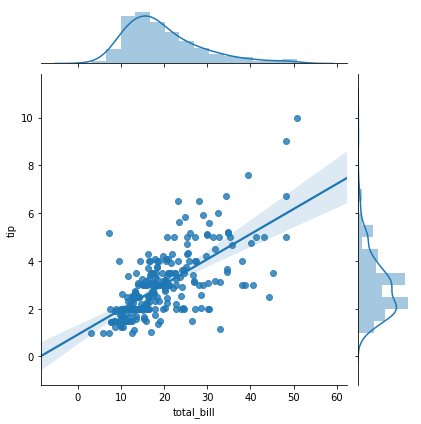

In [9]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

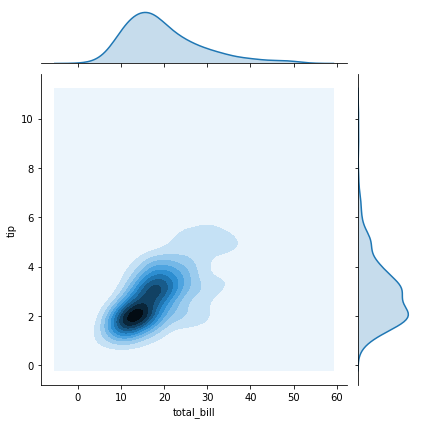

In [10]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'kde')

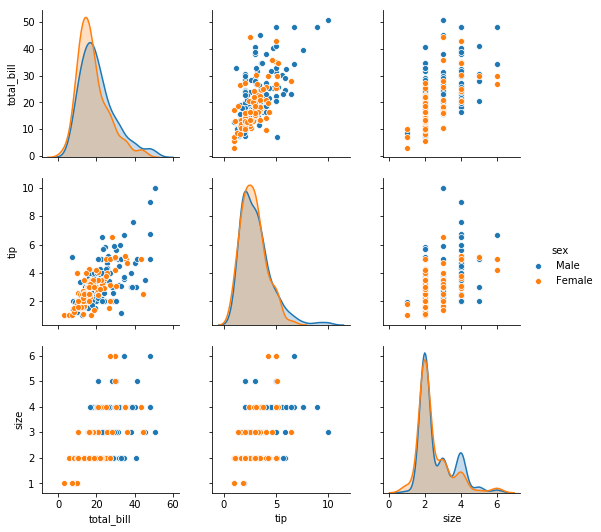

In [11]:
sns.pairplot(tips, hue = 'sex')

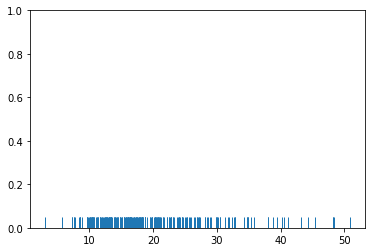

In [14]:
sns.rugplot(tips['total_bill'])

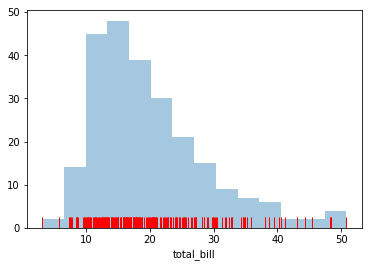

In [17]:
sns.rugplot(tips['total_bill'], color = 'r')
sns.distplot(tips['total_bill'], kde = False)

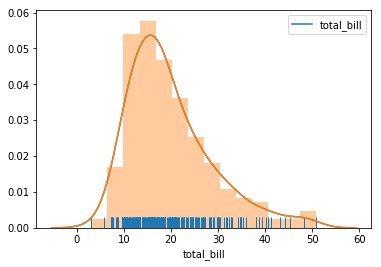

In [18]:
sns.kdeplot(tips['total_bill']) #kernel density estimate it creates gauss distribution around each point
sns.rugplot(tips['total_bill'])
sns.distplot(tips['total_bill'])

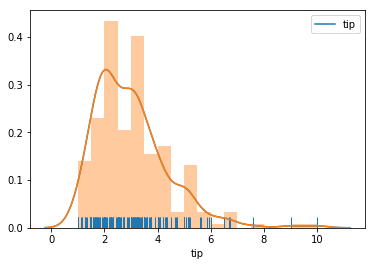

In [19]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])
sns.distplot(tips['tip'])

(0, 1)

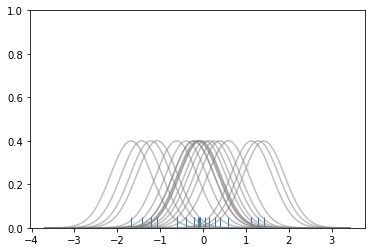

In [20]:
# Step 1: Importing couple of libraries to use 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Creating dataset to use
dataset = np.random.randn(20)

# Creating rugplot using dataset
sns.rugplot(dataset);

# Setting up the x-axis for the plot using max and min values in the dataset
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# creating 100 equally spaced points from x_min to x_max using np.linspace()
x_axis = np.linspace(x_min,x_max,100)

# Setting up the bandwidth, follow the wikipedia link for more information:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Creating an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis) #shift+tab if you want to know more about the function! 
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

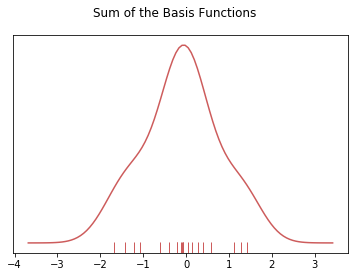

In [21]:
# We need to sum the basis functions to get the kde plot.

# Plotting the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plotting figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Adding the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Getting rid of y-tick marks
plt.yticks([])

# Setting title
plt.suptitle("Sum of the Basis Functions")

## Categorical plots

In [ ]:
#Continue working with tips data

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


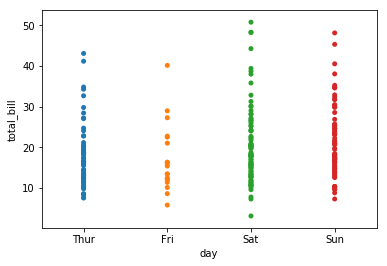

In [25]:
sns.stripplot(x = 'day', y ='total_bill', data = tips, jitter=False) #if jitter is false data points are overlaping

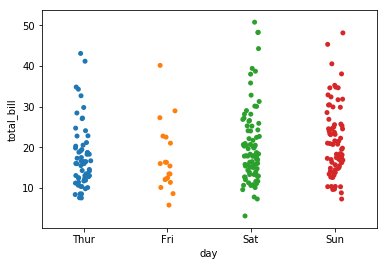

In [24]:
sns.stripplot(x = 'day', y ='total_bill', data = tips, jitter=True) 

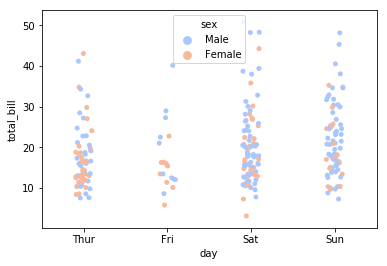

In [27]:
sns.stripplot(x = 'day', y ='total_bill', data = tips, jitter=True, palette = 'coolwarm', hue = 'sex')

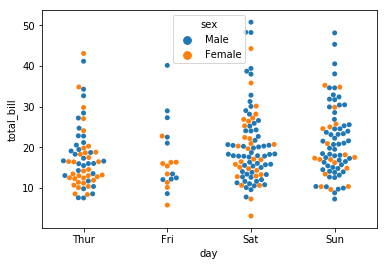

In [30]:
sns.swarmplot(x = 'day', y ='total_bill', data = tips, hue = 'sex')

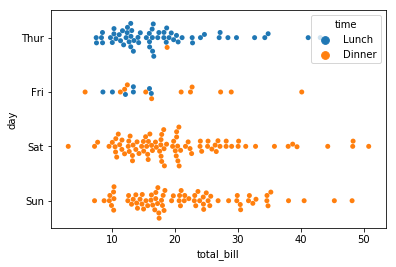

In [31]:
sns.swarmplot(x = 'total_bill', y ='day', data = tips, hue = 'time')

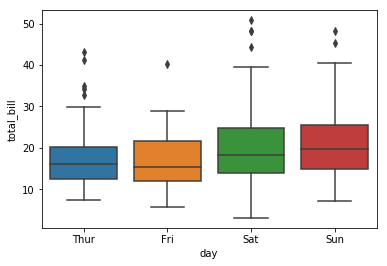

In [33]:
sns.boxplot(x = 'day', y ='total_bill', data = tips) # shows combination of quarters (q1+q2+q3+q4- quartiles

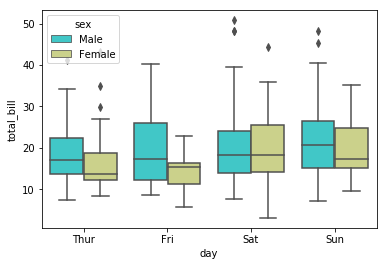

In [34]:
sns.boxplot(x = 'day', y ='total_bill', data = tips, hue = 'sex', palette = 'rainbow')

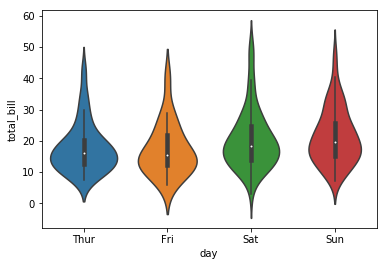

In [35]:
sns.violinplot(x = 'day', y ='total_bill', data = tips) #box plot on top of the violin plot

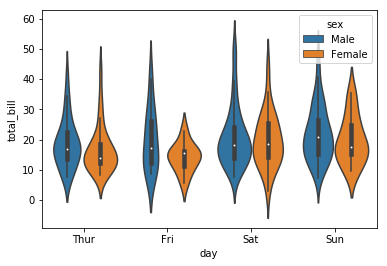

In [36]:
sns.violinplot(x = 'day', y ='total_bill', data = tips, hue = 'sex')

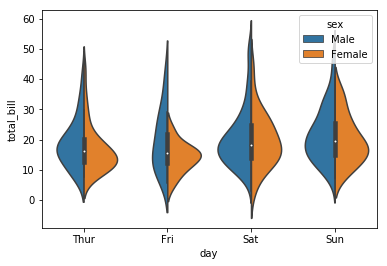

In [37]:
sns.violinplot(x = 'day', y ='total_bill', data = tips, hue = 'sex', split = True)

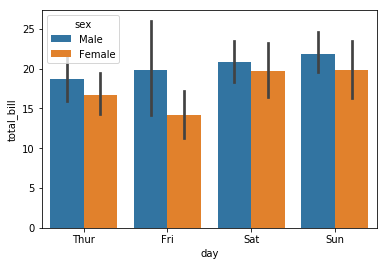

In [39]:
sns.barplot(x = 'day', y ='total_bill', data = tips, hue = 'sex')

In [40]:
import numpy as np

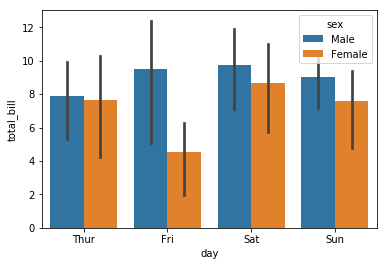

In [41]:
sns.barplot(x = 'day', y ='total_bill', data = tips, hue = 'sex', 
            estimator = np.std)

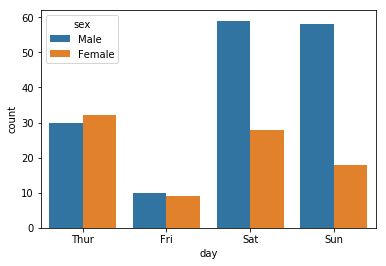

In [43]:
#count plot
sns.countplot(x = 'day', data = tips, hue = 'sex')

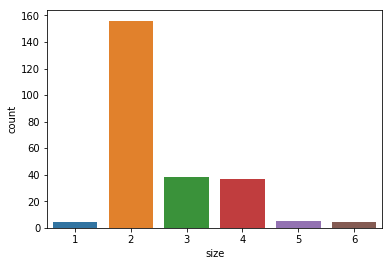

In [45]:
sns.countplot(x = 'size', data = tips)

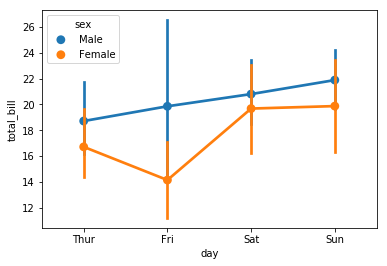

In [46]:
#point plot
sns.pointplot(x = 'day', y ='total_bill', data = tips, hue = 'sex')

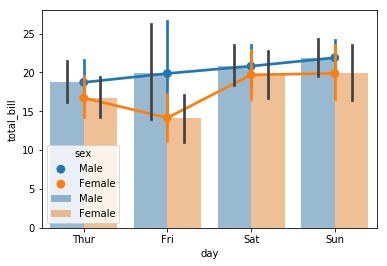

In [48]:
sns.pointplot(x = 'day', y ='total_bill', data = tips, hue = 'sex')
sns.barplot(x = 'day', y ='total_bill', data = tips, hue = 'sex', alpha = 0.5)

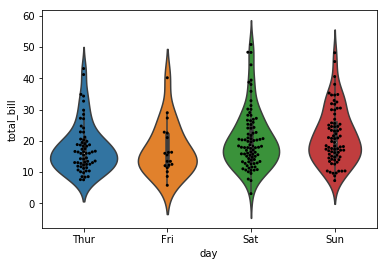

In [50]:
sns.violinplot(x = 'day', y ='total_bill', data = tips)
sns.swarmplot(x = 'day', y ='total_bill', data = tips, color = 'black', size = 3)

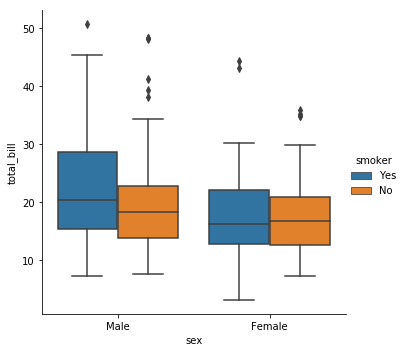

In [52]:
#factor plot(catplot)
sns.catplot(x = 'sex', y ='total_bill', data = tips, hue = 'smoker', kind = 'box')

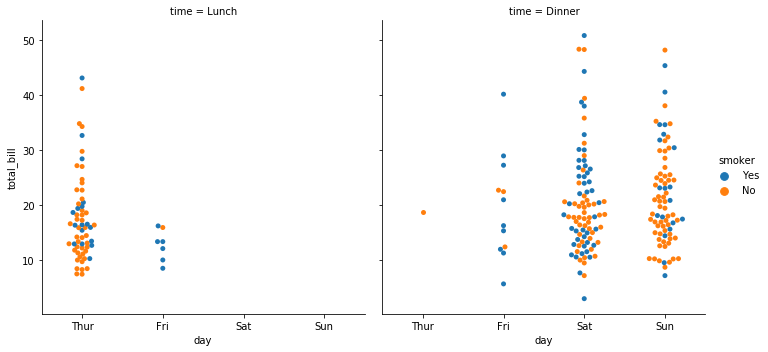

In [53]:
sns.catplot(x = 'day', y ='total_bill', data = tips, 
            hue = 'smoker', kind = 'swarm', col = 'time')

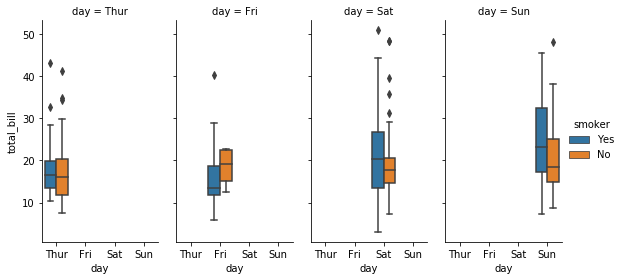

In [55]:
sns.catplot(x = 'day', y ='total_bill', data = tips, 
            hue = 'smoker', kind = 'box', col = 'day', aspect = 0.5, height=4)

## Axis grids

In [56]:
#download one more dataset - iris
iris = sns.load_dataset('iris')

In [57]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [58]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
tips['day'].nunique(), tips['time'].nunique(), tips['smoker'].nunique() 

(4, 2, 2)

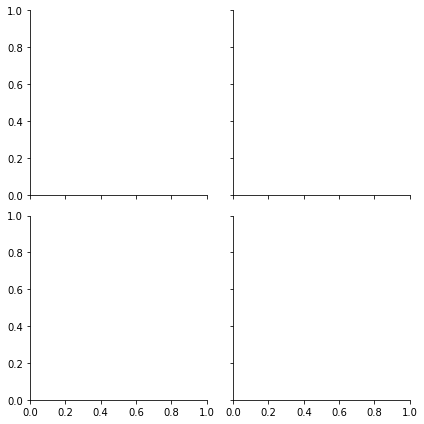

In [65]:
#create Facet grids
g = sns.FacetGrid(data = tips, row = 'smoker', col = 'time')

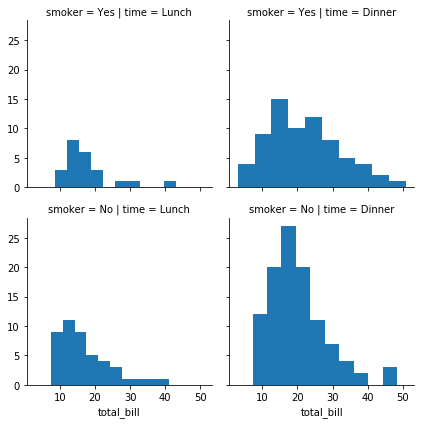

In [67]:
g = sns.FacetGrid(data = tips, row = 'smoker', col = 'time')
g = g.map(plt.hist, 'total_bill')

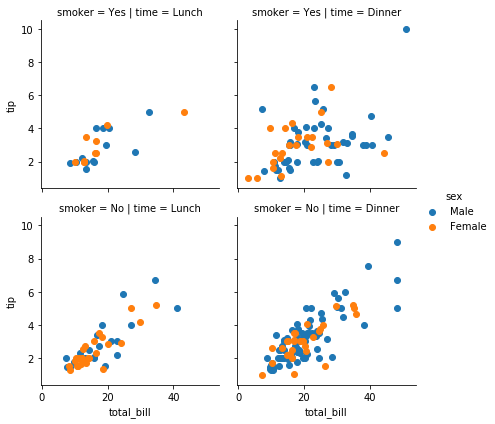

In [70]:
g = sns.FacetGrid(data = tips, row = 'smoker', col = 'time', hue = 'sex')
g = g.map(plt.scatter, 'total_bill', 'tip').add_legend()

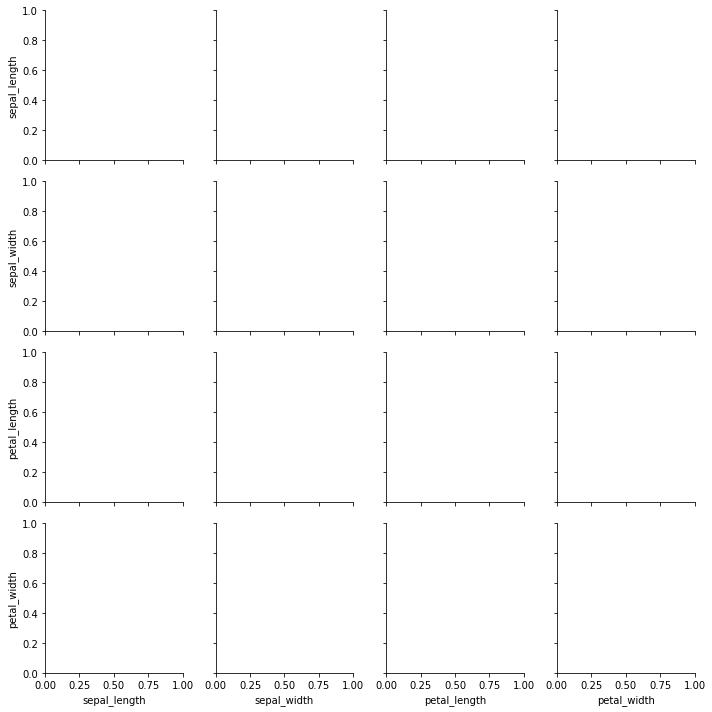

In [71]:
#Create Pair grid
sns.PairGrid(data = iris)

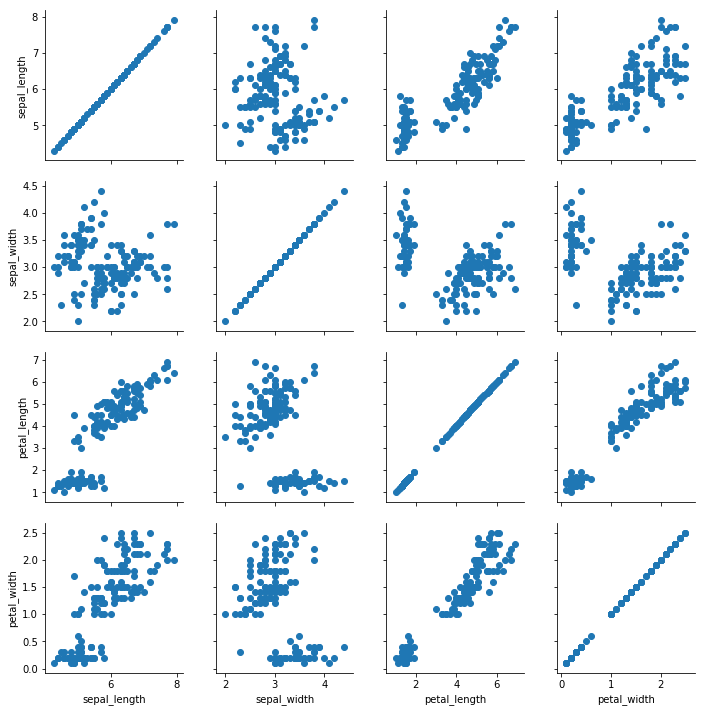

In [72]:
g = sns.PairGrid(data = iris)
g.map(plt.scatter)

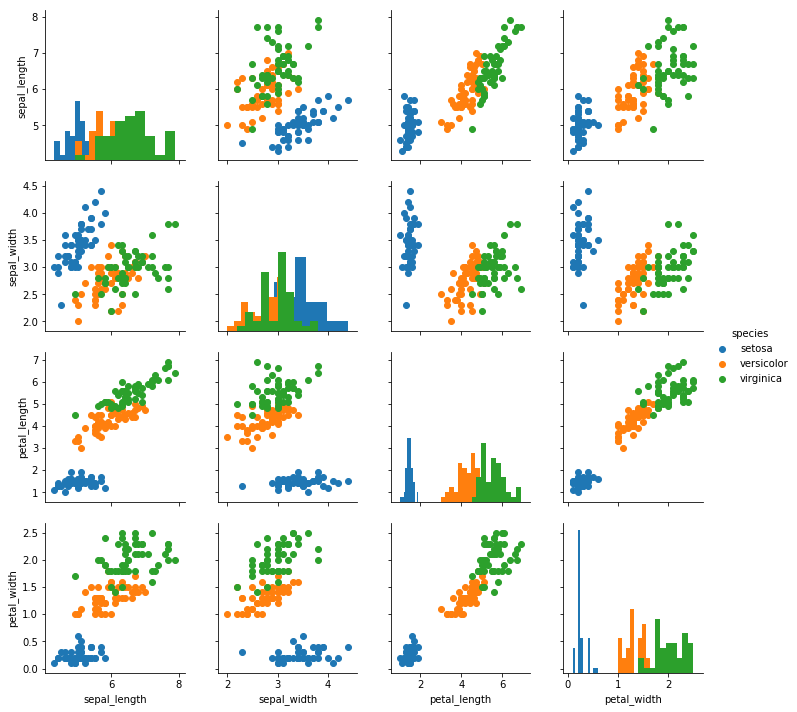

In [76]:
g = sns.PairGrid(iris, hue = 'species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

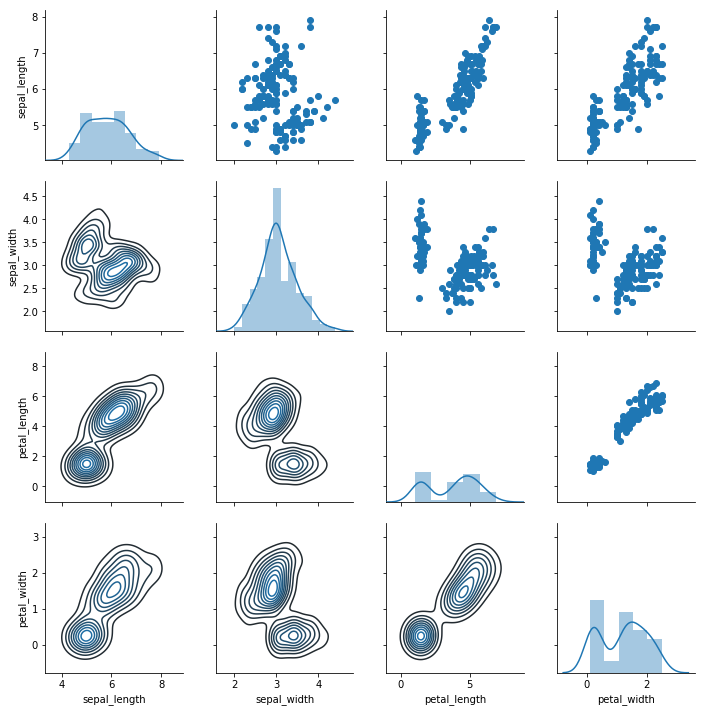

In [78]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


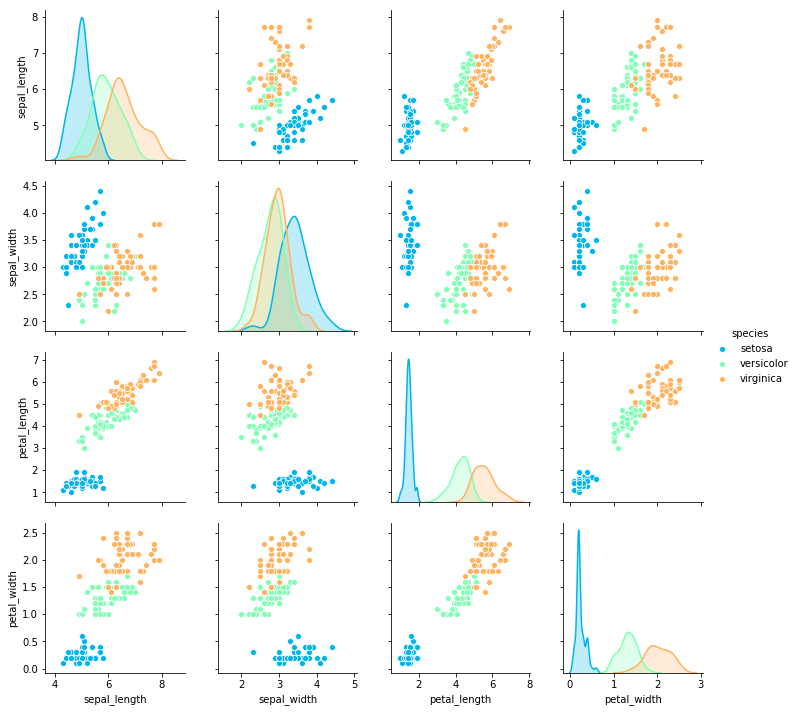

In [81]:
sns.pairplot(iris, hue = 'species', palette = 'rainbow')

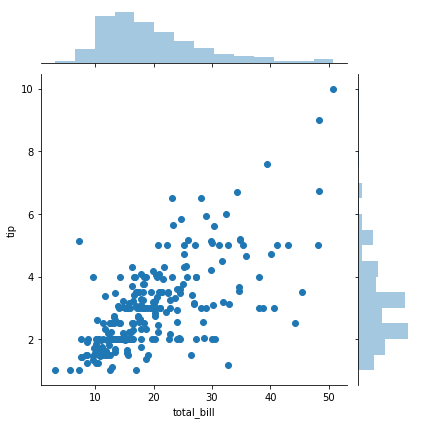

In [83]:
# Create joint plot
sns.jointplot(x='total_bill', y='tip', data=tips)

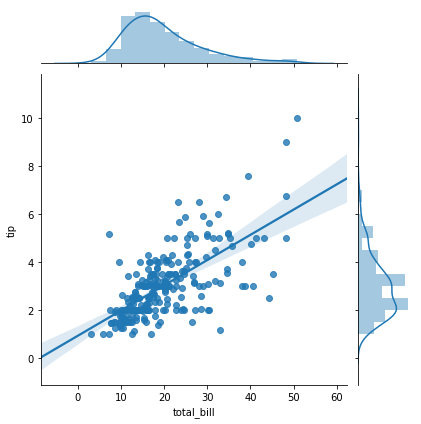

In [84]:
#initialize joint grid
g = sns.JointGrid(x='total_bill', y='tip', data=tips)
g.plot(sns.regplot, sns.distplot)

## Matrix Plots

In [85]:
#add one more dataset
flights = sns.load_dataset('flights')

In [86]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [89]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


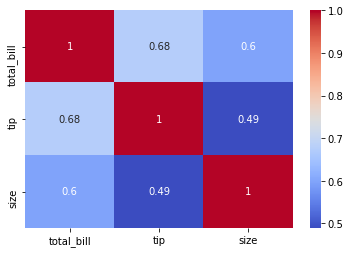

In [91]:
sns.heatmap(tips.corr(), cmap = 'coolwarm', annot = True)

In [94]:
ptf = flights.pivot_table(values='passengers', index='month', columns='year')
ptf

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


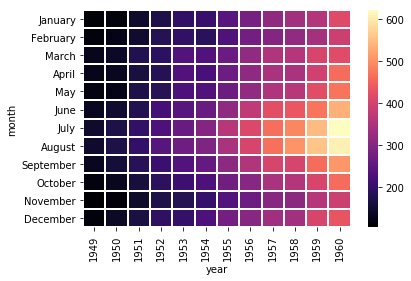

In [96]:
sns.heatmap(ptf, cmap = 'magma', linecolor = 'white', linewidth=1)

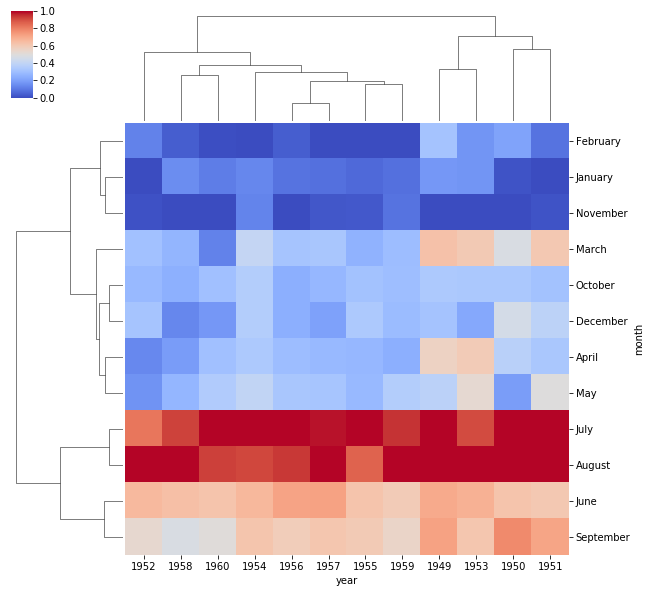

In [99]:
sns.clustermap(ptf, cmap = 'coolwarm', standard_scale=1)

## Regression plots

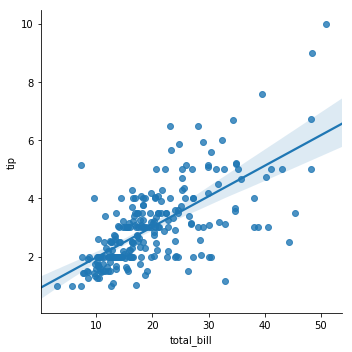

In [101]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

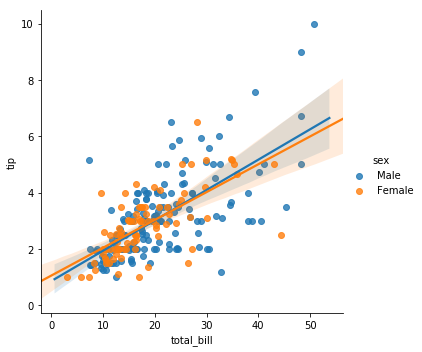

In [102]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex')

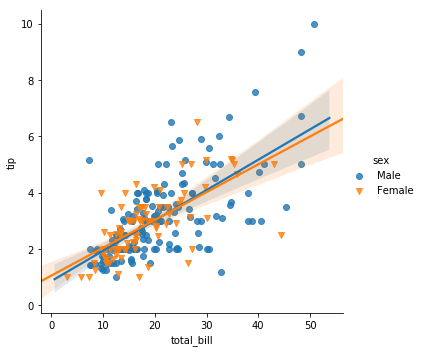

In [104]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', 'v'])

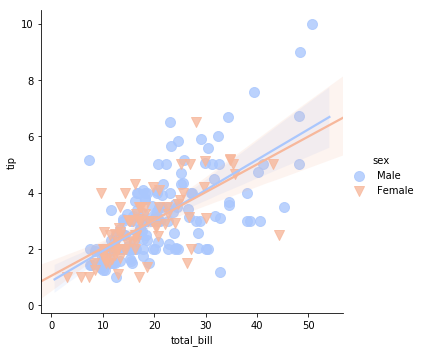

In [106]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', 'v'], 
           scatter_kws = {'s':100}, palette = 'coolwarm')

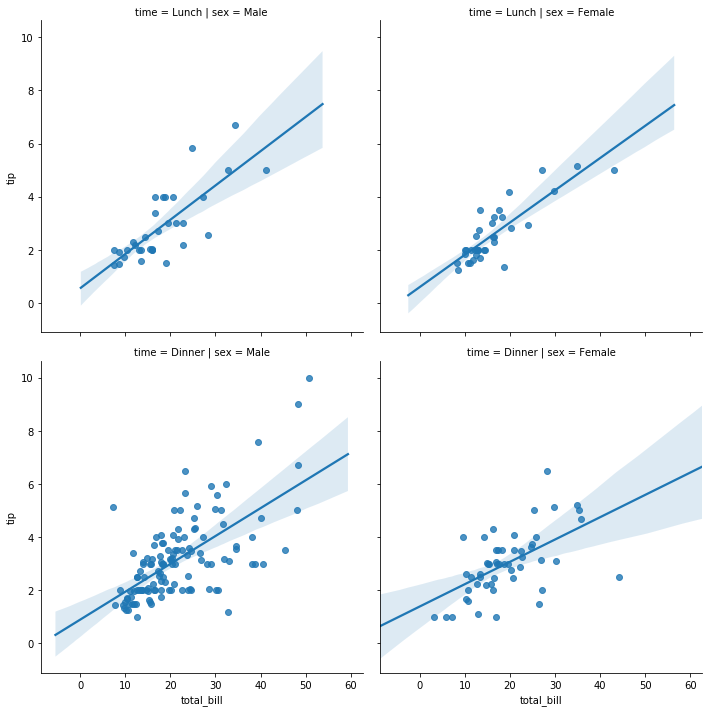

In [109]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'sex', row = 'time')

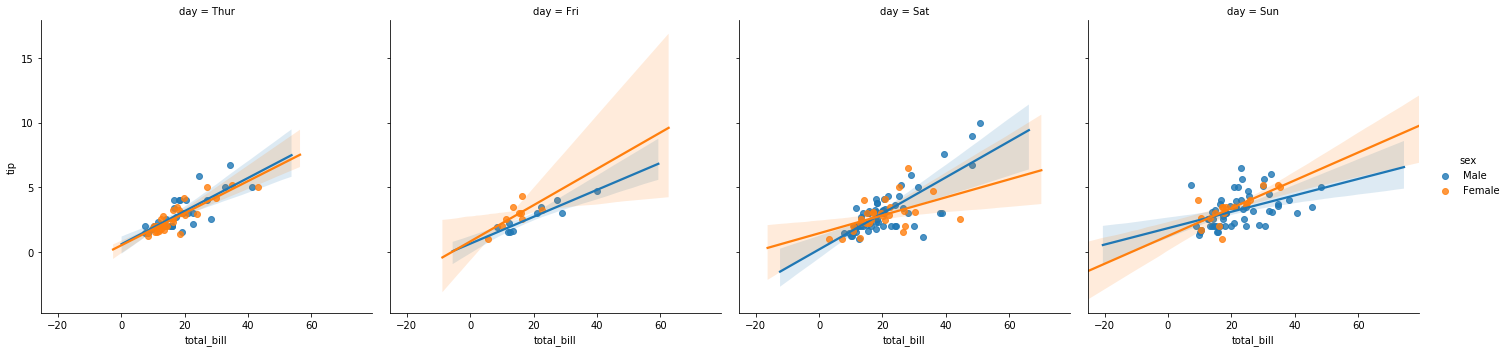

In [110]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex')

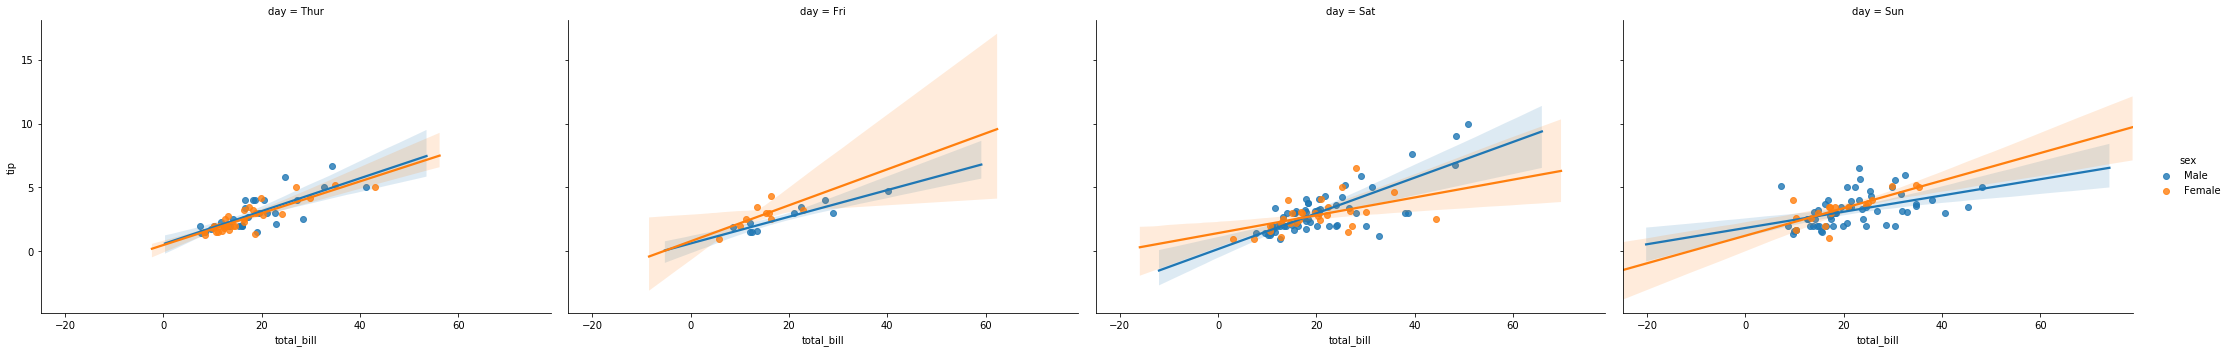

In [117]:
#add aspect ratio and height
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', 
           hue = 'sex', aspect = 1.5, height = 5)

## Figure Aesthetics

In [119]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


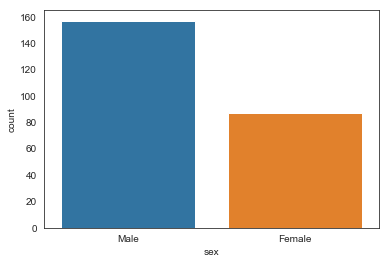

In [121]:
sns.set_style('white')
sns.countplot(x = 'sex', data = tips)

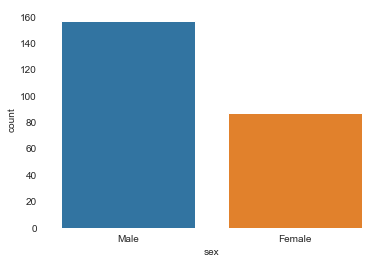

In [122]:
sns.countplot(x = 'sex', data = tips)
sns.despine(top=True, right=True, left=True, bottom=True)

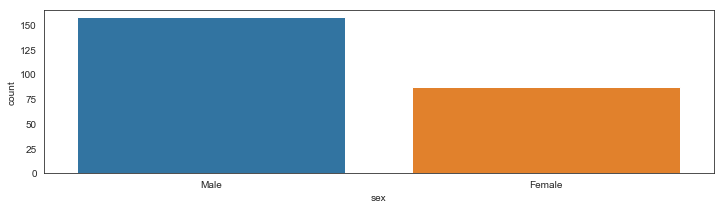

In [125]:
plt.figure(figsize = (12,3))
sns.countplot(x = 'sex', data = tips)

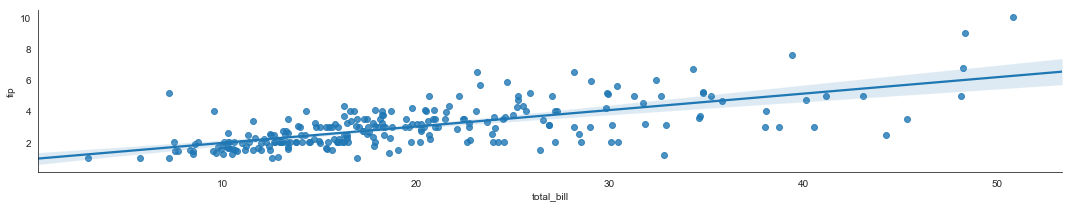

In [128]:
sns.lmplot(x= 'total_bill', y = 'tip', data = tips, height = 3, aspect = 5 )

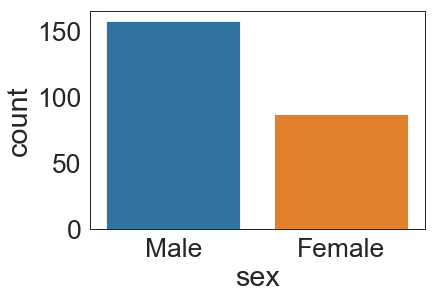

In [129]:
sns.set_context('paper', font_scale = 3)
sns.countplot(x = 'sex', data = tips)